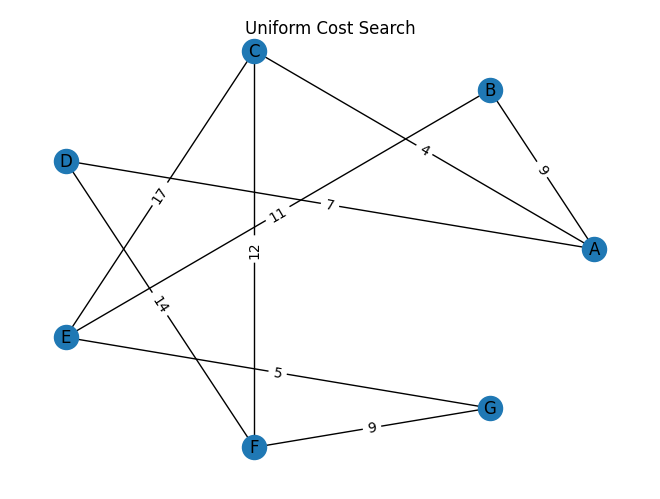

{'A': {'B': 9, 'C': 4, 'D': 7}, 'B': {'A': 9, 'E': 11}, 'C': {'A': 4, 'E': 17, 'F': 12}, 'D': {'A': 7, 'F': 14}, 'E': {'B': 11, 'G': 5, 'C': 17}, 'F': {'D': 14, 'C': 12, 'G': 9}, 'G': {'E': 5, 'F': 9}}
Result(UCS A to G): ['A', 'B', 'E', 'G'] Path cost = 25


<Figure size 640x480 with 0 Axes>

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
def display(graph, directed = False):
    graph = {u : {v : {'weight' : graph[u][v]} for v in graph[u]} for u in graph}
    g = nx.from_dict_of_dicts(graph)
    pos = nx.circular_layout(g)
    nx.draw(g, pos, with_labels = True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels = nx.get_edge_attributes(g, 'weight'))
    plt.suptitle("Uniform Cost Search")
    plt.show()
    plt.clf()
def print_path(node, parent):
    if node != None:
        return print_path(parent[node], parent) + [node]
    return []
def UCS(graph, start, goal):
    queue = [start]
    visited = []
    parent = {start : None}
    cost = {start : 0}
    while queue:
        queue.sort(key = lambda x : cost[x])
        node = queue.pop(0)
        visited.append(node)
        if node == goal:
            print(f"Result(UCS {start} to {goal}):",print_path(node, parent),"Path cost =",cost[node])
            return True
        for adj in graph[node]:
            if adj not in visited:
                new_cost = cost[node] + graph[node][adj]
                if adj not in queue:
                    queue.append(adj)
                elif new_cost > cost[adj]:
                    continue
                cost[adj] = new_cost
                parent[adj] = node
    print(f"Result(UCS {start} to {goal}): No Solution")
    return False
def get_graph(directed = False):
    graph = {}
    print("Enter edge (u, v, weight)")
    print("[PRESS ENTER TO STOP]")
    x = input()
    while x:
        x = x.split(maxsplit = 1)
        u, adj = x[0], [v.strip(' ()') for v in x[1].strip('[]').split(',') if v] 
        if len(adj) == 1:
            v, w = adj[0].split()
            adj = {v : int(w)}
        else:
            adj = {v : int(w) for v, w in zip(adj[::2],adj[1::2])}
        graph[u] = graph.get(u, {}) | adj
        for v, w in adj.items():
            graph[v] = graph.get(v, {}) | ({u : w} if not directed else {})
        x = input()
    return graph
def example():
    graph = {"A" : {"B":9,"C":4,"D":7},
             "B" : {"A":9,"E":11},
             "C" : {"A":4,"E":17,"F":12},
             "D" : {"A":7,"F":14},
             "E" : {"B":11,"G":5,"C":17},
             "F" : {"D":14,"C":12,"G":9},
             "G" : {"E":5,"F":9}}
    display(graph)
    print(graph)
    UCS(graph, "A", "G")

def main():
    #example();return #Uncomment to run the example
    graph = get_graph(directed = False)#undirected graph
    source, goal = input("Enter source and goal: ").split()
    display(graph, directed = False)
    print(graph)
    UCS(graph, source, goal)

    #Sample output
    #Enter edge (u, v, weight) 
    #[Press Enter To Stop]
    #A B 9
    #A C 4
    #A D 7
    #B E 11
    #C E 17
    #C F 12
    #D F 14
    #E G 5
    #F G 9
 
    #Enter source and goal:  A G
    #Result(UCS A to G): ['A', 'B', 'E', 'G'] Path cost = 25
main()